In [8]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from tabulate import tabulate

from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.utils.visualization import mlab_pose_vis
from contact_graspnet.datatypes import GraspCam

In [ ]:
### plot all original images ###

# ycb_path = Path.home() / "Documents" / "ycb_sim_data_1"
# obj_names = sorted([p.name for p in ycb_path.iterdir()])

# for i, name in enumerate(obj_names):
#     print(f"{i}: {name}")

#     img = np.load(ycb_path / name)["rgb_img"]

#     plt.imshow(img)

#     plt.show()

In [4]:
ycb_result_paths = [
    get_root_dir() / "data" / "results" / "ycb_sim_data_1",
    get_root_dir() / "data" / "results" / "ycb_sim_data_2",
    get_root_dir() / "data" / "results" / "ycb_sim_data_3",
]
ycb_result_names = sorted([p.name for p in ycb_result_paths[0].iterdir() if p.is_dir()])

example_result_paths = [
    get_root_dir() / "data" / "results" / "orig_test_data_seg1",
    get_root_dir() / "data" / "results" / "orig_test_data_seg2",
    get_root_dir() / "data" / "results" / "orig_test_data_seg3",
    get_root_dir() / "data" / "results" / "orig_test_data_seg4",
]
example_result_names = sorted([p.name for p in example_result_paths[0].iterdir() if p.is_dir()])



In [ ]:
### show the mlab visualization of all results in a folder ###

result_path = result_paths[0]

for result_name in result_names:
    print(result_name)

    mlab_pose_vis(
        np.load(result_path / result_name / "full_pc.npy"),
        [
            GraspCam(**d)
            for d in json.load(open(result_path / result_name / "data.json"))[
                "grasps_cam"
            ]
        ],
        np.load(result_path / result_name / "full_pc_colors.npy"),
    )


ycb_sim_data_1
samples with no grasps: 8


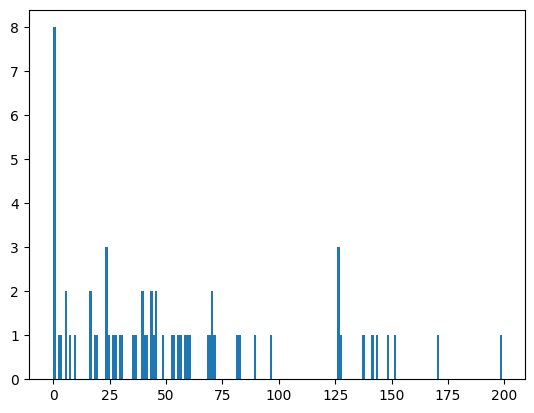

ycb_sim_data_2
samples with no grasps: 20


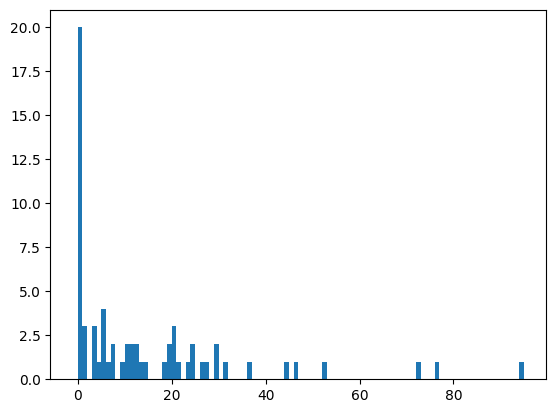

ycb_sim_data_3
samples with no grasps: 19


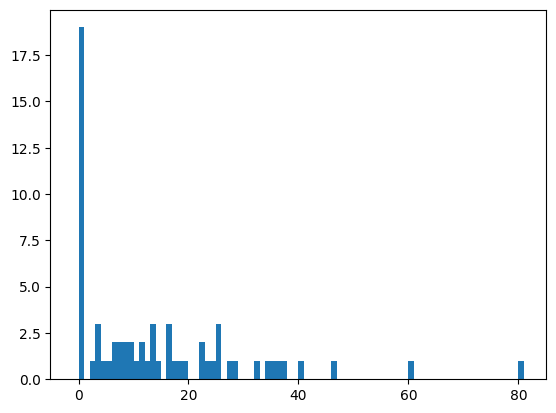

names                        ycb_sim_data_1    ycb_sim_data_2    ycb_sim_data_3
-------------------------  ----------------  ----------------  ----------------
001_master_chef_can                      71                 1                 3
002_cracker_box                          43                76                35
003_sugar_box                            55                52                36
004_tomato_soup_can                     148                29                60
005_mustard_bottle                       82                36                28
006_tuna_fish_can                         5                 6                 6
007_pudding_box                           0                 0                 5
008_gelatin_box                           0                 0                 7
009_potted_meat_can                     126                20                19
010_banana                               48                18                 9
011_strawberry                          

In [15]:
### histograms of the number of grasps per sampe

n_grasps_table = {}
n_grasps_table["names"] = ycb_result_names + ["total"]

for result_path in ycb_result_paths:
    n_grasps = []
    n_grasps_table[result_path.name] = []

    for result_name in ycb_result_names:
        with open(result_path / result_name / "data.json") as f:
            data = json.load(f)

        n = len(data["grasps_cam"])
        
        n_grasps.append(n)
        n_grasps_table[result_path.name].append(n)

    n_grasps = np.array(n_grasps)
    n_grasps_table[result_path.name].append(sum(n_grasps))

    plt.hist(n_grasps, bins=np.arange(-1, max(n_grasps)+1))
    print(result_path.name)
    print(f"samples with no grasps: {np.sum(n_grasps == 0)}")
    plt.show()

print(tabulate(n_grasps_table, headers="keys"))

In [ ]:
# for result_name in result_names:
#     fig, axes = plt.subplots(2, len(result_paths), figsize=(10, 5))
#     fig.suptitle(result_name)
#     fig.tight_layout()

#     for i, result_path in enumerate(result_paths):
#         all_grasps = mpl.image.imread(result_path / result_name / "all_grasps.png")
#         best_grasp = mpl.image.imread(result_path / result_name / "best_grasp.png")

#         axes[i][0].imshow(all_grasps)
#         axes[i][0].set_title("all grasps")

#         axes[i][1].imshow(best_grasp)
#         axes[i][1].set_title("best grasp")

#     plt.show()
